## Importar las librerias necesarias
Asegurese de tener instaladas las siguientes librerias en su ordenador:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

## Importar los DF
Para trabajar en el EDA importo los dos conjuntos de datos necesarios para este analisis

In [2]:
df_hechos = pd.read_excel('../Data/df_hechos.xlsx')
df_victimas = pd.read_excel('../Data/df_victimas.xlsx')

print(df_hechos.shape)
df_hechos.head()

(696, 19)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Viernes
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Domingo
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,NaN,Domingo
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves


In [27]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             695 non-null    object        
 7   HH               695 non-null    float64       
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  Calle            695 non-null    object        
 11  COMUNA           696 non-null    int64         
 12  XY (CABA)        696 non-null    object        
 13  pos x            684 non-null    float64       
 14  pos y            684 non-null    float64  

El conjunto de datos tiene 696 entradas y 19 columnas:  
- `ID` Identificador unico del siniestro  
- `N_VICTIMAS` Cantidad de victimas del siniestro  
- `FECHA` Fecha en formato dd/mm/aaaa  
- `AAAA` Año del siniestro  
- `MM` Mes del siniestro  
- `DD` Dia del mes  
- `HORA` Hora del siniestro  
- `HH` Franja horaria del siniestro  
- `LUGAR_DEL_HECHO` Direccion del siniestro  
- `TIPO_DE_CALLE` Tipo de la calle  
- `Calle` Nombre de la calle  
- `COMUNA` Comuna de la ciudad  
- `XY (CABA)` Geocodificacion plana  
- `pos x` Longitud  
- `pos y` Latitud  
- `PARTICIPANTES` Conjuncion de victima y acusado  
- `VICTIMA` Vehiculo en el que se encontraba la victima  
- `ACUSADO` Vehiculo en el que se encontraba el acusado
- `DIA_SEMANA` Dia de la semana

In [28]:
df_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,696.000000,696,696.000000,696.000000,696.000000,695.000000,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,11.657554,7.425287,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,17.500000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654
std,0.179393,NaN,1.683754,3.571309,8.639646,6.700090,4.387050,0.046144,0.035289


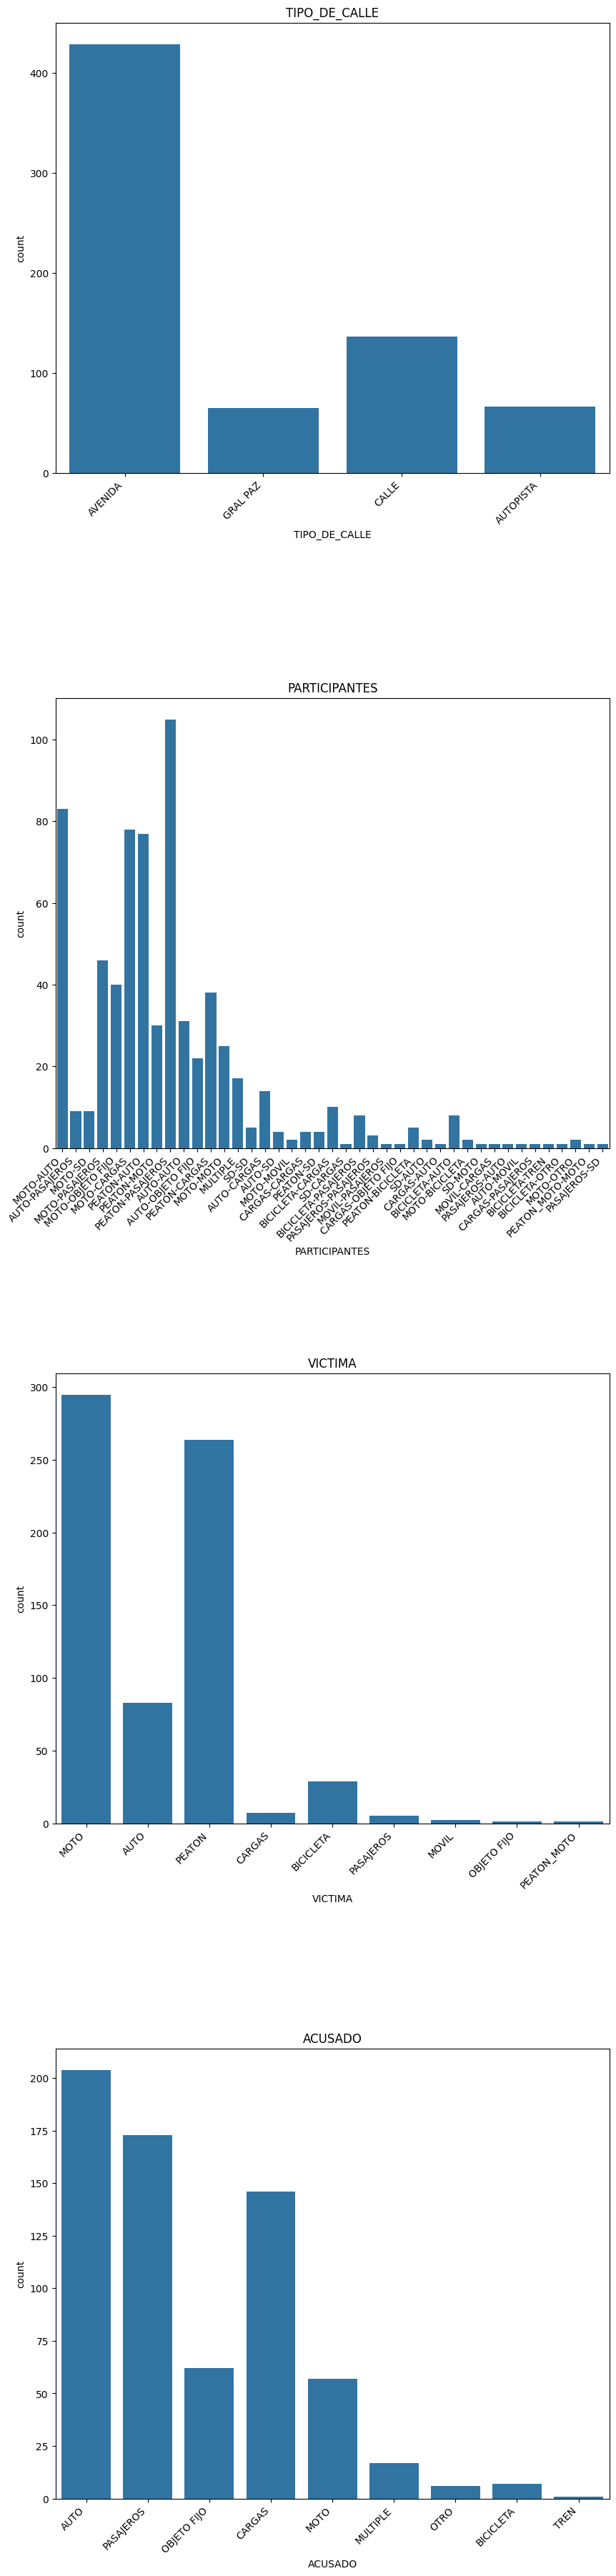

In [29]:
col_cat = ['TIPO_DE_CALLE', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_hechos, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

#### Conclusion:  
En este analisis se observa que los siniestros ocurren mayormente en las avenidas, en menor proporcion en las calles y las autopistas.  
Los participantes son mayormente los peatones-pasajeros, en segundo lugar los auto-moto, y en tercer y cuarto lugar respectivamente las moto-cargas y peaton-auto, con menores valores en las demas columnas.  
Se observa una preocupante cantidad de victimas en moto y peatones, siendo mas de tres veces los valores de la columna auto.  
Los acusados suelen ser mayormente los autos, los pasajeros ocupan el segundo lugar pero estos son acompañantes en el vehiculo acusado del siniestro.

In [30]:
print(df_victimas.shape)
df_victimas.head()

(717, 12)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,MES,DIA_SEMANA,RANGO_EDAD
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,Enero,Viernes,< 20
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,Enero,Sábado,> 60
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,Enero,Domingo,20 - 40
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,Enero,Domingo,< 20
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,Enero,Jueves,20 - 40


In [31]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID_hecho    717 non-null    object        
 1   FECHA       717 non-null    datetime64[ns]
 2   AAAA        717 non-null    int64         
 3   MM          717 non-null    int64         
 4   DD          717 non-null    int64         
 5   ROL         706 non-null    object        
 6   VICTIMA     708 non-null    object        
 7   SEXO        711 non-null    object        
 8   EDAD        664 non-null    float64       
 9   MES         717 non-null    object        
 10  DIA_SEMANA  717 non-null    object        
 11  RANGO_EDAD  664 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 67.3+ KB


El conjunto de datos tiene 717 entradas y 12 columnas:  
- `ID_hecho` Identificador unico del siniestro   
- `FECHA` Fecha en formato dd/mm/aaaa  
- `AAAA` Año del siniestro  
- `MM` Mes del siniestro  
- `DD` Dia del mes  
- `ROL` Posición relativa al vehículo que presentaba la víctima en el momento del siniestro  
- `VICTIMA` Vehiculo en el que se encontraba la victima  
- `SEXO` Genero de la víctima
- `EDAD` Edad de la víctima
- `Mes` Mes del siniestro
- `DIA_SEMANA` Dia de la semana
- `RANGO_EDAD` Rango etario de la victima

In [32]:
df_victimas.describe()

,FECHA,AAAA,MM,DD,EDAD
count,717,717.000000,717.000000,717.000000,664.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,42.167169
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,27.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,37.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,56.250000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000
std,NaN,1.672655,3.575140,8.683358,19.788034


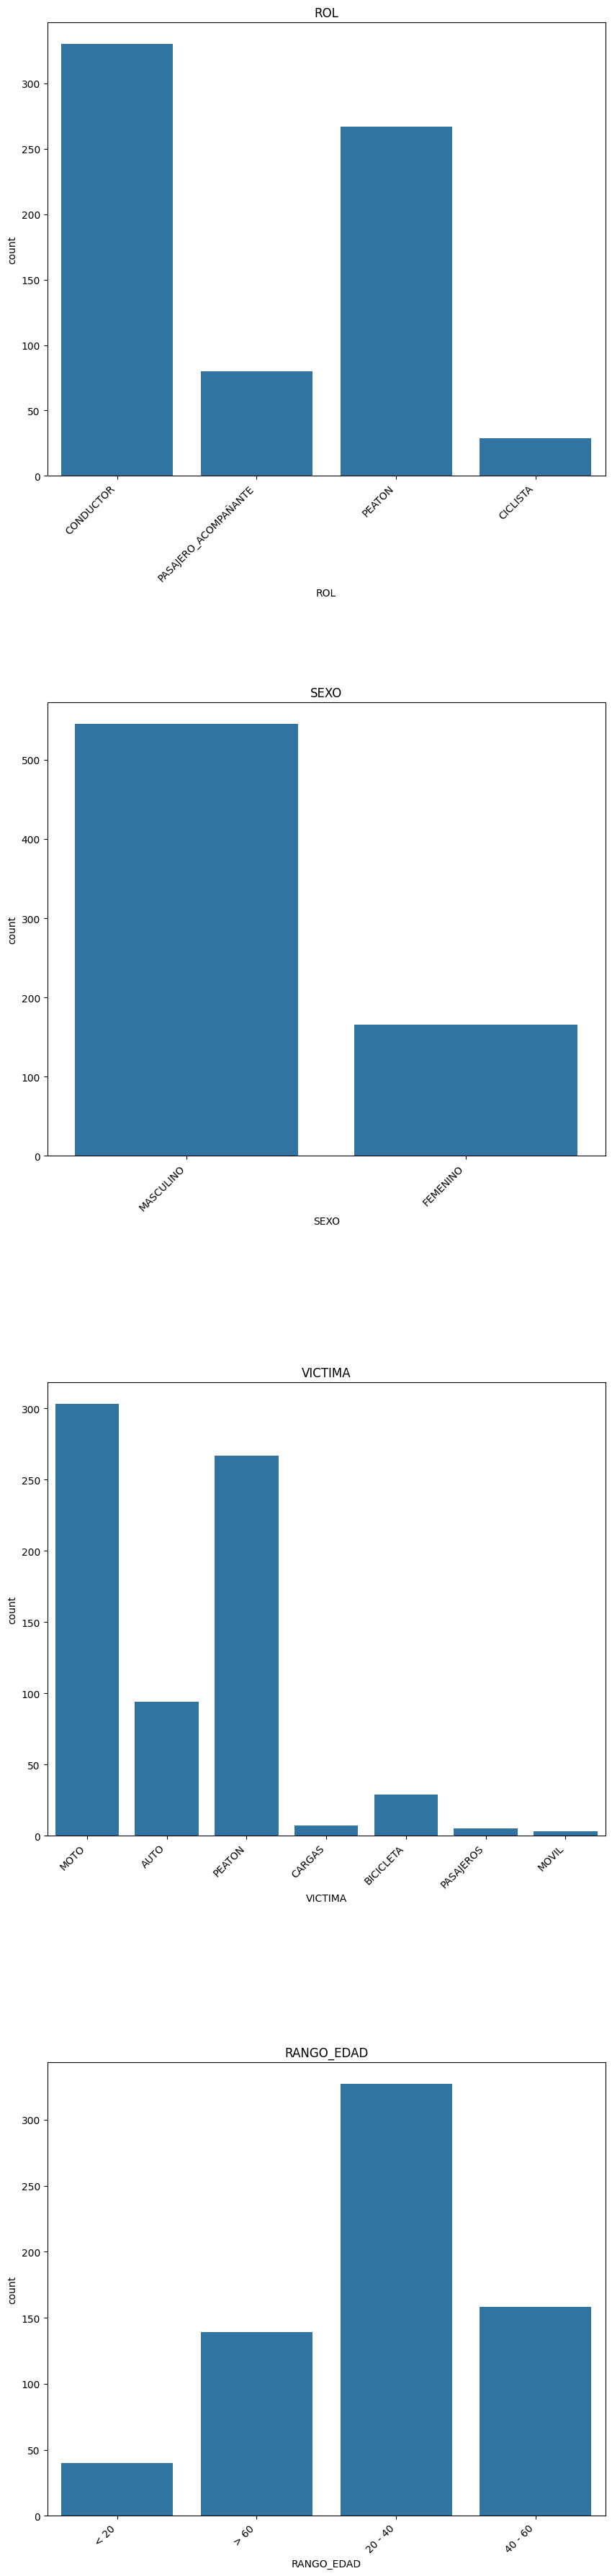

In [3]:
var_cat = ['ROL', 'SEXO', 'VICTIMA', 'RANGO_EDAD']

fig, ax = plt.subplots(nrows=len(var_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_cat):
    sns.countplot(x=col, data=df_victimas, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

#### Conclusion
Se observa que los roles con mas numero de victimas son los de conductor y peaton.  
Las victimas suelen ser en su mayoria hombres. Pero esto se debe a que hay una mayor cantidad de conductores masculinos.  
El vehiculo en el que se encuentran las victimas son, mayormente, motos o peatones. Esto se debe a que los vehiculos de menor porte brindan una seguridad mucho menor que un auto, lo que respecta un mayor numero de victimas.  
El rango etario de las victimas tiene un mayor valor entre los 20 y 40 años, siendo mas del doble que la que se encuentra en segundo lugar. Una de las razones es porque es el promedio de edad de los trabajadores.

In [34]:
df_victimas.isnull().sum()

ID_hecho       0
FECHA          0
AAAA           0
MM             0
DD             0
ROL           11
VICTIMA        9
SEXO           6
EDAD          53
MES            0
DIA_SEMANA     0
RANGO_EDAD    53
dtype: int64

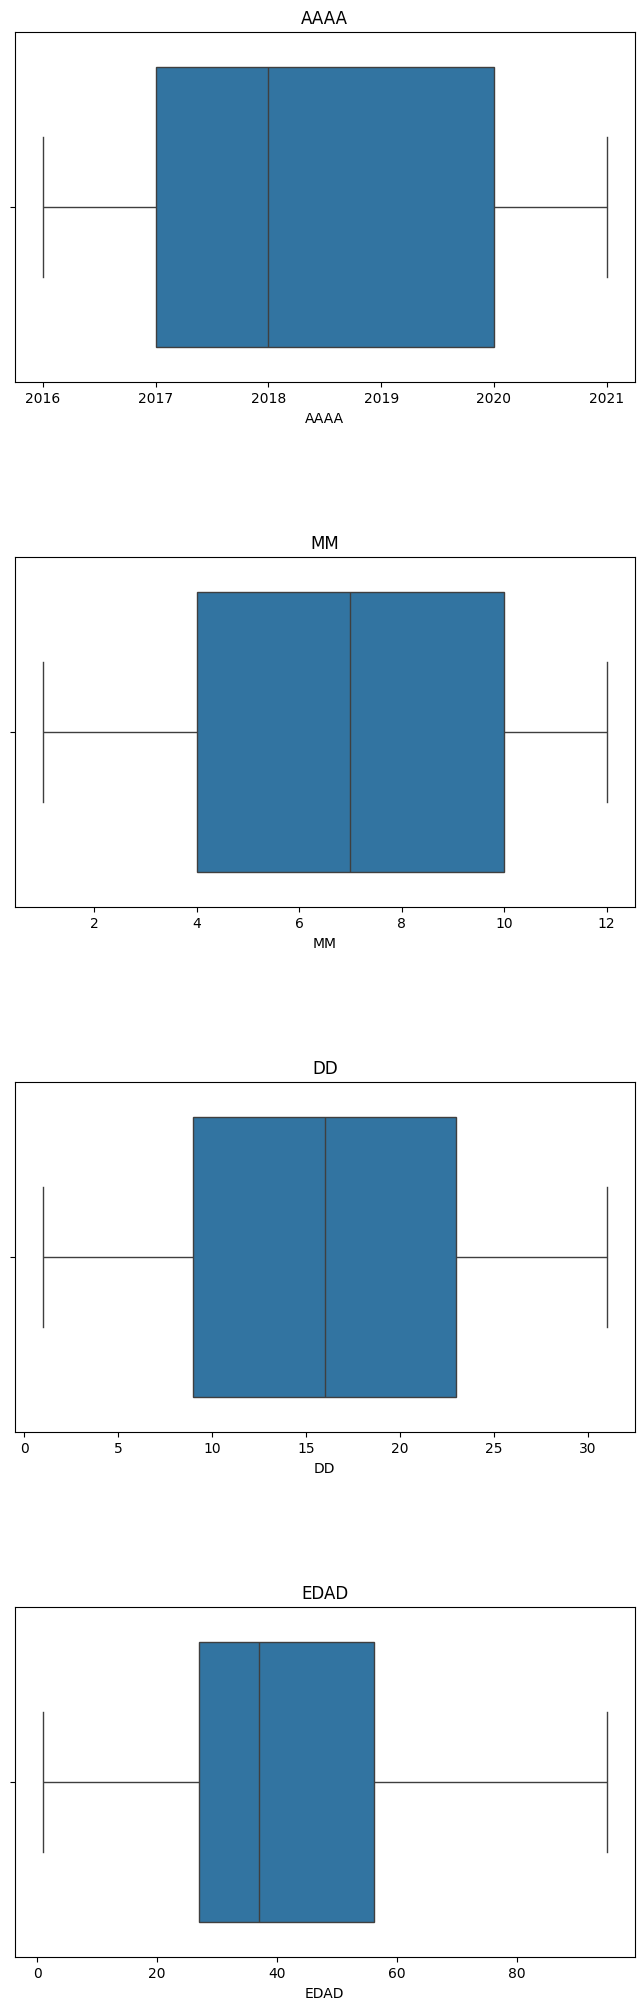

In [37]:
df_victimas_edad = df_victimas.dropna(subset=['RANGO_EDAD'])

cols_num = ['AAAA', 'MM', 'DD', 'EDAD']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,25))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_victimas_edad, ax=ax[i])
    ax[i].set_title(col)

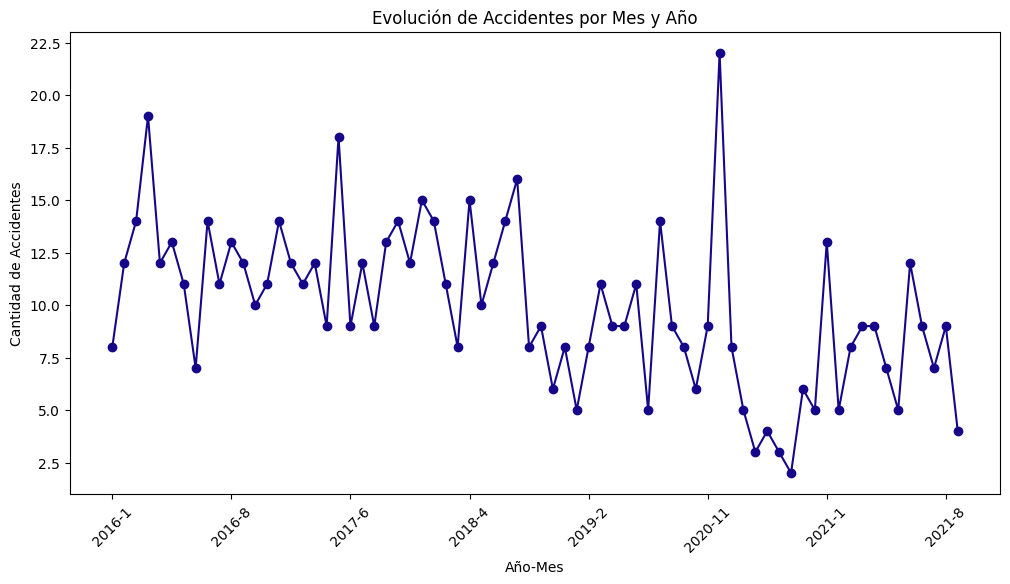

In [39]:
df_victimas['AAAA-MM'] = df_victimas['AAAA'].astype(str) + '-' + df_victimas['MM'].astype(str)

plt.figure(figsize=(12, 6))
df_victimas.groupby('AAAA-MM').size().plot(marker='o', color=sns.color_palette('plasma', n_colors=len(df_victimas['AAAA-MM'].unique())))
plt.title('Evolución de Accidentes por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

En este gráfico se observa un decrecimiento de víctimas en el año 2020, pero con un gran número alrededor de diciembre del mismo año. El decrecimiento se debe a la cuarentena por la pandemia de COVID-19, durante ese mismo año se flexibilizó la cuarentena durante las festividades.

<Figure size 1200x600 with 0 Axes>

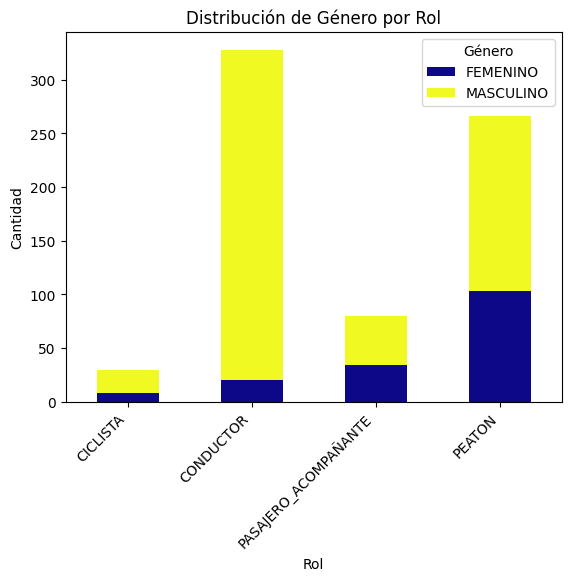

In [40]:
plt.figure(figsize=(12, 6))
genero_rol_df = df_victimas.groupby(['ROL', 'SEXO']).size().unstack()
ax = genero_rol_df.plot(kind='bar', stacked=True, colormap='plasma')

plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.legend(title='Género', loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


Se observa que la mayoría de víctimas con el rol de conductor son hombres, debido a que es un número proporcional a que hay más conductores masculinos que femeninos. Se ve reflejado en las víctimas con rol de peaton y pasajero, donde el gráfico es más equitativo.

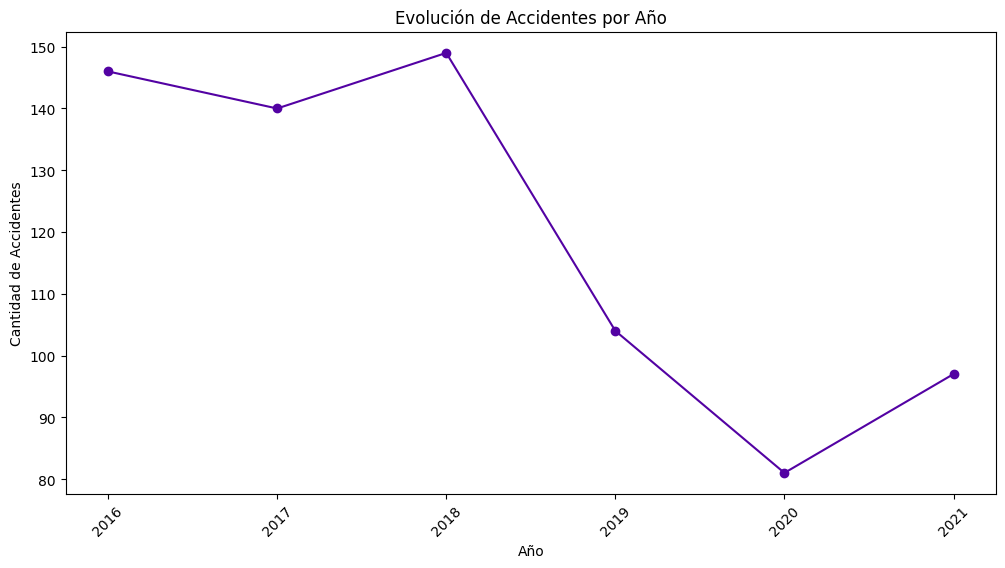

In [41]:
plt.figure(figsize=(12, 6))
df_victimas.groupby('AAAA').size().plot(marker='o', color=sns.color_palette('plasma', n_colors=len(df_victimas['AAAA'].unique())))
plt.title('Evolución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

La cantidad de víctimas durante los años 2016-2018 tenía un valor que fluctuaba ligeramente, es a partir de 2019 con la llegada de la pandemia que se ve un gran decrecimiento en la cantidad de víctimas.

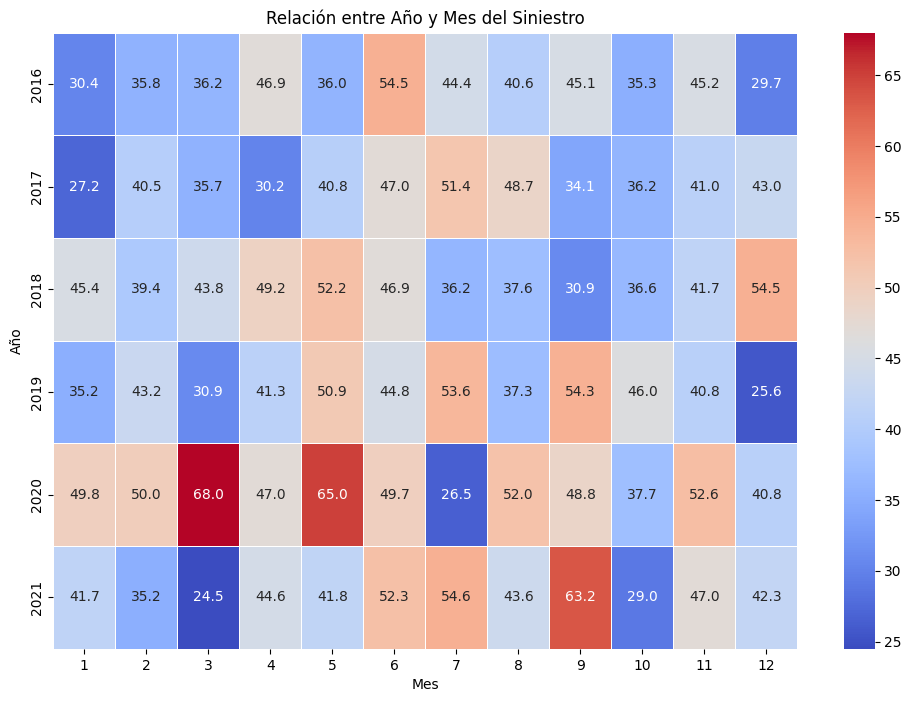

In [4]:
plt.figure(figsize=(12, 8))
heatmap_data = df_victimas.pivot_table(index='AAAA', columns='MM', values='EDAD', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Relación entre Año y Mes del Siniestro')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

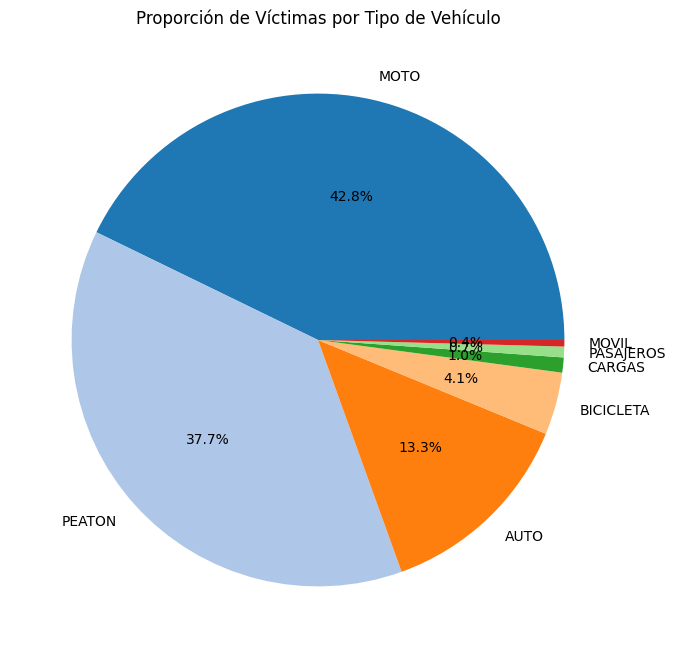

In [43]:
plt.figure(figsize=(8, 8))
vehiculo_palette = sns.color_palette('tab20', n_colors=len(df_victimas['VICTIMA'].unique()))
df_victimas['VICTIMA'].value_counts().plot.pie(autopct='%1.1f%%', colors=vehiculo_palette)
plt.title('Proporción de Víctimas por Tipo de Vehículo')
plt.ylabel('')
plt.show()

Hay un alarmante número de víctimas que se encontraban en motos a la hora del siniestro, seguido de los peatones, y en tercer lugar los automóviles. Esta mayor cantidad de víctimas es por la seguridad que brinda cada vehículo, además de las medidas de seguridad que seguía la víctima al momento del siniestro (por ejemplo, el correcto uso del casco).

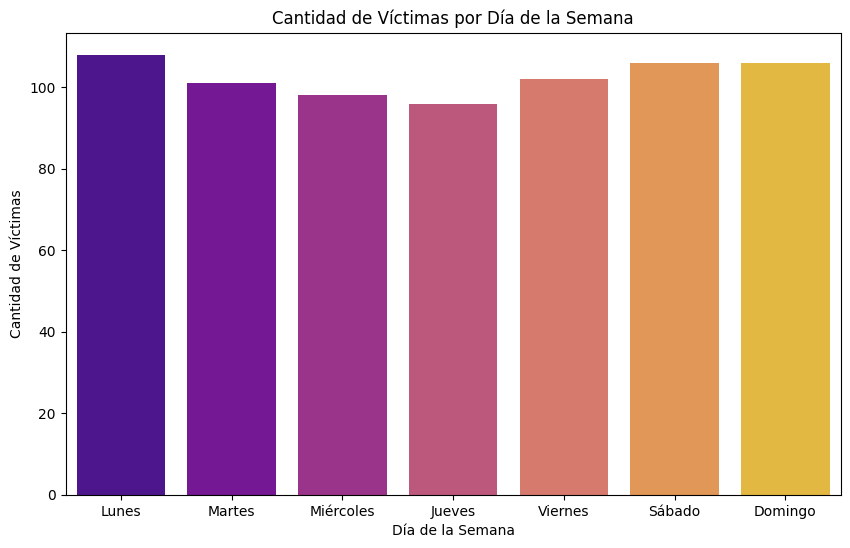

In [44]:
victimas_por_dia = df_victimas['DIA_SEMANA'].value_counts()

orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

victimas_por_dia = victimas_por_dia.reindex(orden_dias)

plt.figure(figsize=(10, 6))
sns.barplot(x=victimas_por_dia.index, y=victimas_por_dia.values, palette='plasma')
plt.title('Cantidad de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Víctimas')
plt.show()


Se evidencia un ligero incremento de víctimas en los fines de semanas y los lunes. Esto puede deberse a la ingesta de alcohol por parte de las víctimas o del acusado. Otro motivo puede ser el inicio de la semana laboral los lunes, generando un mayor tráfico. Los aumentos los fines de semana también pueden ser ocasionados por las reuniones con amigos o familiares.

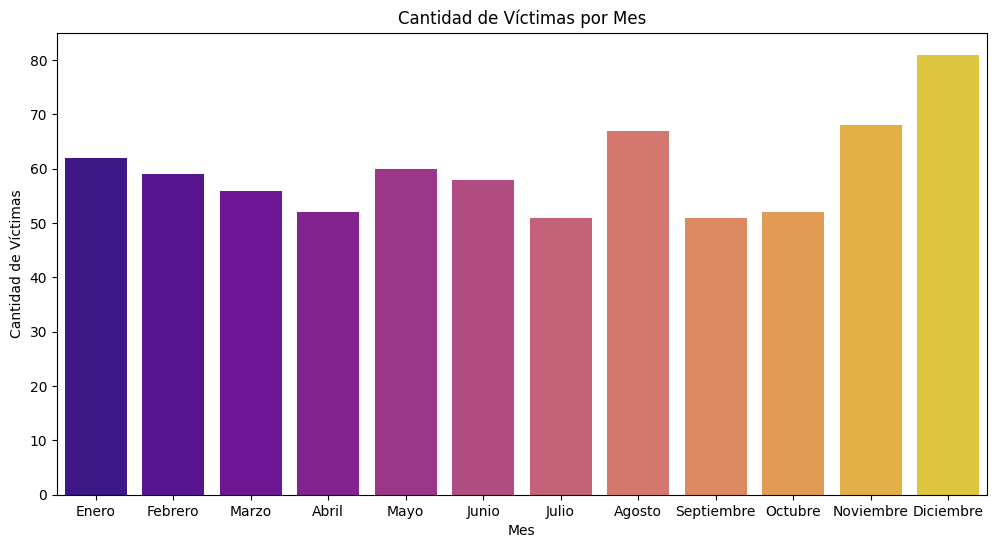

In [45]:
victimas_por_mes = df_victimas['MES'].value_counts()

orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

victimas_por_mes = victimas_por_mes.reindex(orden_meses)

plt.figure(figsize=(12, 6))
sns.barplot(x=victimas_por_mes.index, y=victimas_por_mes.values, palette='plasma')
plt.title('Cantidad de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Se aprecia un claro incremento de víctimas durante el mes de diciembre, en este caso sí puede deberse a la ingesta de alcohol durante las festividades, que derivan en mayores accidentes de tránsito por esta imprudencia.

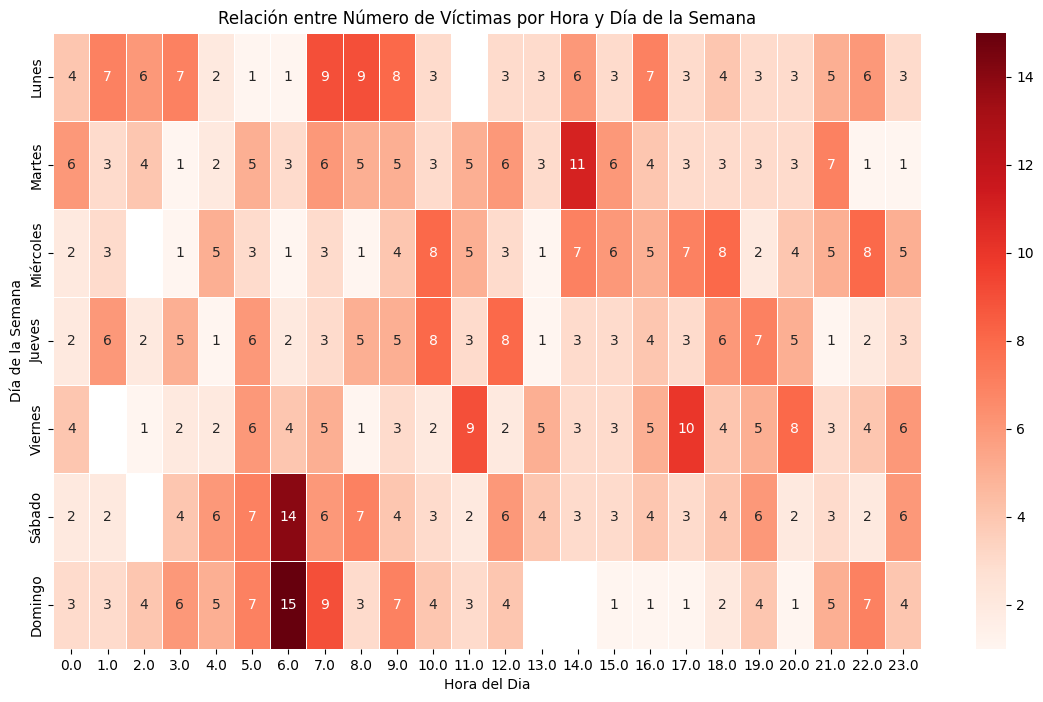

In [46]:
victimas_por_hora_dia = df_hechos.pivot_table(index='DIA_SEMANA', columns='HH', values='ID', aggfunc='count')

victimas_por_hora_dia = victimas_por_hora_dia.reindex(orden_dias)

plt.figure(figsize=(14, 8))
sns.heatmap(victimas_por_hora_dia, cmap='Reds', annot=True, fmt='g', linewidths=.5)
plt.title('Relación entre Número de Víctimas por Hora y Día de la Semana')
plt.xlabel('Hora del Dia')
plt.ylabel('Día de la Semana')
plt.show()

Hay un claro aumento de víctimas a las 6 de la mañana en los fines de semana. Uno de los motivos puede ser los previamente comentados: ingesta de alcohol.

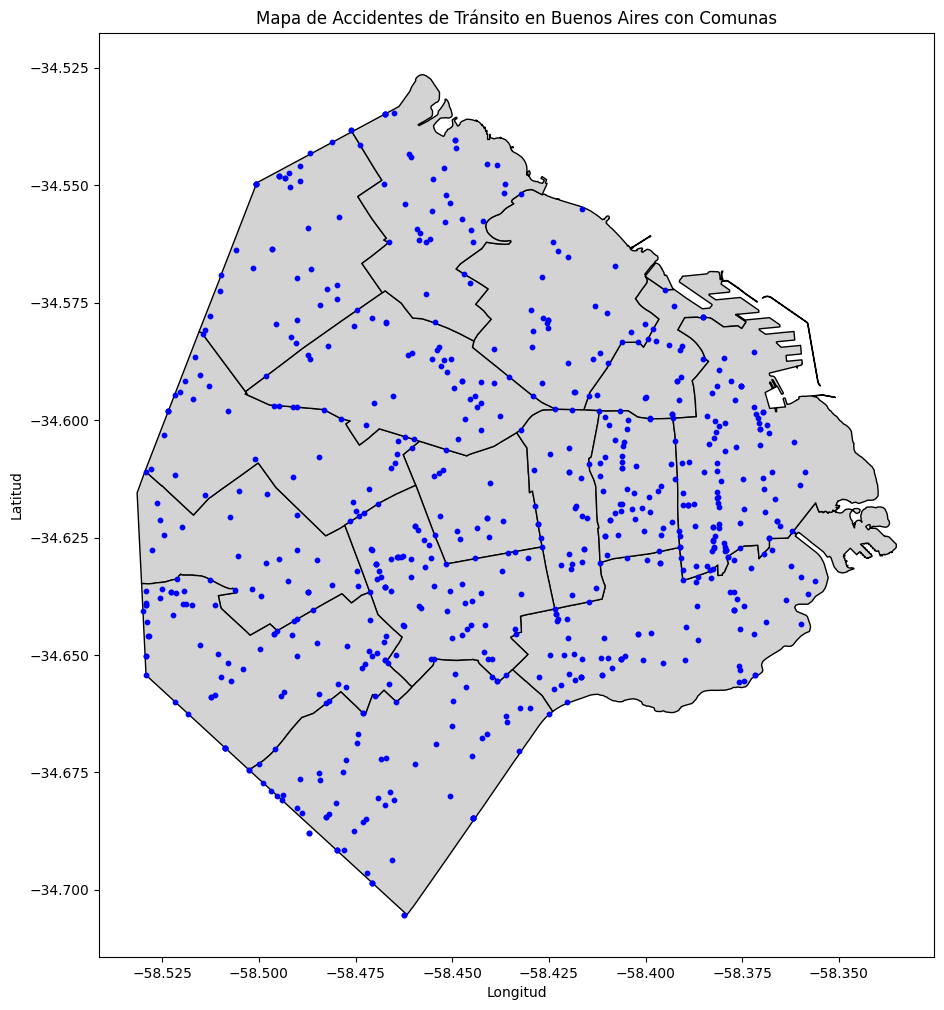

In [47]:
gdf_comunas = gpd.read_file('../Comunas/comunas_wgs84.shp')

geometry_puntos = [Point(xy) for xy in zip(df_hechos['pos x'], df_hechos['pos y'])]
gdf_puntos = gpd.GeoDataFrame(df_hechos, geometry=geometry_puntos, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(12, 12))

gdf_comunas.plot(ax=ax, edgecolor='black', color='lightgray')

gdf_puntos.plot(ax=ax, marker='o', color='blue', markersize=10)

plt.title('Mapa de Accidentes de Tránsito en Buenos Aires con Comunas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

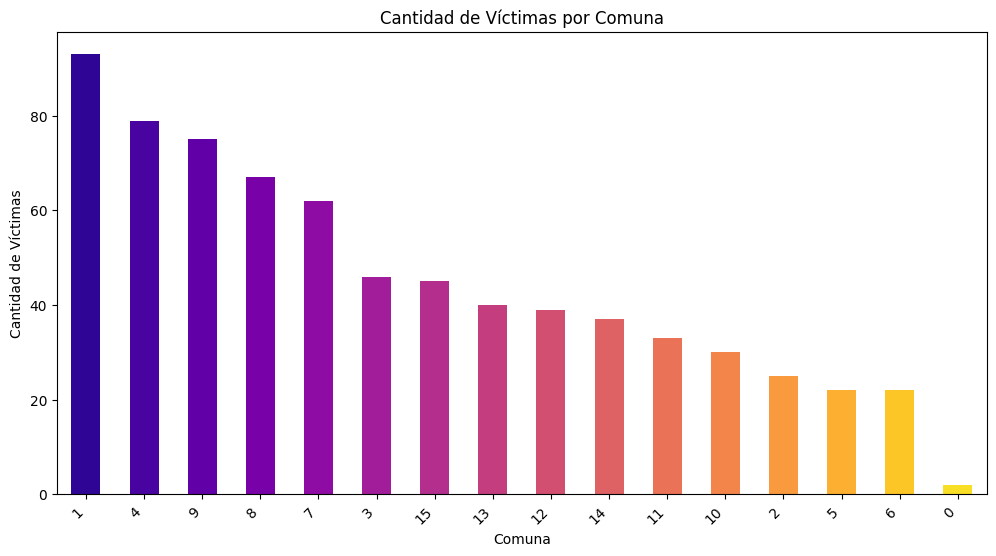

In [48]:
comunas_victimas = df_hechos.groupby('COMUNA')['N_VICTIMAS'].sum().sort_values(ascending=False)

colores = sns.color_palette('plasma', n_colors=len(comunas_victimas))

plt.figure(figsize=(12, 6))
comunas_victimas.plot(kind='bar', color=colores)
plt.title('Cantidad de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45, ha='right')
plt.show()

Una mayor cantidad de víctimas en determinadas comunas puede ser ocasionada por la alta densidad del tráfico en esas zonas.

## CONCLUSIÓN
Se ha notado una disminución constante desde 2018, con un punto bajo destacado en 2020 debido a las medidas de cuarentena por el COVID-19. Sin embargo, al examinar el desglose mensual de ese año, se ha detectado un aumento notable a partir de diciembre, atribuido a una relajación de las restricciones por las festividades.

Posteriormente, se ha analizado la distribución de víctimas según los días de la semana, identificando que los lunes y los fines de semana registran los números más altos. Esto se explica por el inicio de la semana laboral los lunes, que aumenta el tráfico, y los fines de semana, cuando las personas tienden a salir y reunirse, aumentando así la movilidad y el tráfico.

Se ha examinado la distribución horaria de los accidentes, notándose un aumento marcado alrededor de las 6 de la mañana. Durante los fines de semana, este aumento se relaciona con la salida a boliches y fiestas, aumentando las posibilidades de accidentes debido a conductores ebrios.

Se ha observado que la mayoría de las víctimas son hombres, principalmente entre los 20 y 40 años, siendo las motocicletas y los peatones los más afectados. Las motocicletas son vulnerables en la carretera, y los peatones pueden ser afectados por el comportamiento imprudente de algunos conductores.

Esta concentración de accidentes en el grupo de edad de 20 a 40 años puede ser ocasionada por encontrarse entre las personas que van a trabajar o aquellas que salen a reuniones o fiestas con mayor frecuencia en el caso de los más jovenes. Este análisis destaca la necesidad de medidas preventivas y una mayor conciencia pública para mejorar la seguridad vial.